<a href="https://colab.research.google.com/github/Vamarinpe/PAE/blob/master/CodRecurso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Por agente

# importa la librería
import pandas as pd
import numpy as np
pd.set_option('display.notebook_repr_html', False)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import csv

Datos = pd.read_csv(
    "https://raw.githubusercontent.com/Vamarinpe/PAE/master/Recurso.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Fecha","Codigo Agente","Recurso"],
    usecols=["Fecha","Codigo Agente","Recurso","Precio Oferta Ideal"],      # Datosnuevo=Datos[['Fecha','Codigo Agente','Recurso']]  - otra forma
    parse_dates=["Fecha"],
    dayfirst=True)

In [0]:
# verificar lectura
len(Datos)
Datos.columns
Datos.describe()
Datos.head(60)
Datos.count()

In [0]:
# contando registros con groupby
Datos.groupby('Codigo Agente')['Precio Oferta Ideal'].count()
Datos.groupby('Recurso')['Precio Oferta Ideal'].count()
Datos.groupby('Fecha')['Precio Oferta Ideal'].count()            # también sin el ['Precio Oferta Ideal']
#Datos.groupby('Codigo Agente').count()

In [0]:
# muestra con loc, debe decir los indices especificos, de mayor a menor
Datos.loc[('2012-09-04')]
Datos.loc[('2012-09-04','EPMG')]
plt.plot(Datos.loc[('2017-09-05','EPMG')])
plt.plot(Datos.loc[('2017-09-06','EPMG')])
plt.plot(Datos.loc[('2019-08-31','EPMG')])
plt.show()
#Datos.loc['2012-01-01':'2013-12-31']                         # también funciona para rangos

In [0]:
# muestra con iloc, encuentra el dato que le digo en numero
Datos.iloc[-2:]

In [0]:
# muestra con xs, filtra y muestra todo lo del nivel especifico indicado, muestra lo de los demás indices
Datos.xs('2012-06-08',level='Fecha')
Datos.xs('EPMG',level='Codigo Agente')
Datos.xs('GUATAPE',level='Recurso').plot()
Datos.xs('PLAYAS',level='Recurso').plot()
plt.rcParams["figure.figsize"] = (20,8)

In [0]:
# agrega columna con el combustible
Combustible = pd.read_csv(
    "https://raw.githubusercontent.com/Vamarinpe/PAE/master/Listado_Recursos_Generacion.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Nombre Recurso"],
    usecols=["Nombre Recurso","Combustible Por Defecto"])      # Datosnuevo=Datos[['Fecha','Codigo Agente','Recurso']]  - otra forma

Datos['Combustible']=Datos.index.get_level_values('Recurso').map(Combustible['Combustible Por Defecto'])

In [0]:
# funcion para obtener los recursos de más capacidad en cada año (10 primeros)
def capacidad(x):
  Cap = pd.read_csv(
    x,
    sep = ';',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Recurso"],
    usecols=["Recurso","Capacidad Efectiva Neta kW","Combustible por defecto"])
  return Cap.sort_values(by='Capacidad Efectiva Neta kW',ascending=False).drop_duplicates().head(10)

def capacidad1(x):
  Cap = pd.read_csv(
    x,
    sep = ';',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Recurso"],
    usecols=["Recurso","Capacidad Efectiva Neta","Combustible por defecto"])
  return Cap.sort_values(by='Capacidad Efectiva Neta',ascending=False).drop_duplicates().head(10)

C2000=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2000.csv")
C2001=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2001.csv")
C2002=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2002.csv")
C2003=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2003.csv")
C2004=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2004.csv")
C2005=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2005.csv")
C2006=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2006.csv")
C2007=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2007.csv")
C2008=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2008.csv")
C2009=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2009.csv")
C2010=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2010.csv")
C2011=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2011.csv")
C2012=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2012.csv")
C2013=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2013.csv")
C2014=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2014.csv")
C2015=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2015.csv")
C2016=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2016.csv")
C2017=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2017.csv")


In [0]:
# filtra Datos y muestra solo los que tienen mayor capacidad
#2000
Datos2000=Datos.loc['2000']
NuevaDatos2000=Datos2000[Datos2000.index.get_level_values('Recurso').isin(list(C2000.index))]
#2001
Datos2001=Datos.loc['2001']
NuevaDatos2001=Datos2001[Datos2001.index.get_level_values('Recurso').isin(list(C2001.index))]
#2002
Datos2002=Datos.loc['2002']
NuevaDatos2002=Datos2002[Datos2002.index.get_level_values('Recurso').isin(list(C2002.index))]
#2003
Datos2003=Datos.loc['2003']
NuevaDatos2003=Datos2003[Datos2003.index.get_level_values('Recurso').isin(list(C2003.index))]
#2004
Datos2004=Datos.loc['2004']
NuevaDatos2004=Datos2004[Datos2004.index.get_level_values('Recurso').isin(list(C2004.index))]
#2005
Datos2005=Datos.loc['2005']
NuevaDatos2005=Datos2005[Datos2005.index.get_level_values('Recurso').isin(list(C2005.index))]
#2006
Datos2006=Datos.loc['2006']
NuevaDatos2006=Datos2006[Datos2006.index.get_level_values('Recurso').isin(list(C2006.index))]
#2007
Datos2007=Datos.loc['2007']
NuevaDatos2007=Datos2007[Datos2007.index.get_level_values('Recurso').isin(list(C2007.index))]
#2008
Datos2008=Datos.loc['2008']
NuevaDatos2008=Datos2008[Datos2008.index.get_level_values('Recurso').isin(list(C2008.index))]
#2009
Datos2009=Datos.loc['2009']
NuevaDatos2009=Datos2009[Datos2009.index.get_level_values('Recurso').isin(list(C2009.index))]
#2010
Datos2010=Datos.loc['2010']
NuevaDatos2010=Datos2010[Datos2010.index.get_level_values('Recurso').isin(list(C2010.index))]
#2011
Datos2011=Datos.loc['2011']
NuevaDatos2011=Datos2011[Datos2011.index.get_level_values('Recurso').isin(list(C2011.index))]
#2012
Datos2012=Datos.loc['2012']
NuevaDatos2012=Datos2012[Datos2012.index.get_level_values('Recurso').isin(list(C2012.index))]
#2013
Datos2013=Datos.loc['2013']
NuevaDatos2013=Datos2013[Datos2013.index.get_level_values('Recurso').isin(list(C2013.index))]
#2014
Datos2014=Datos.loc['2014']
NuevaDatos2014=Datos2014[Datos2014.index.get_level_values('Recurso').isin(list(C2014.index))]
#2015
Datos2015=Datos.loc['2015']
NuevaDatos2015=Datos2015[Datos2015.index.get_level_values('Recurso').isin(list(C2015.index))]
#2008
Datos2016=Datos.loc['2016']
NuevaDatos2016=Datos2016[Datos2016.index.get_level_values('Recurso').isin(list(C2016.index))]
#20017
Datos2017=Datos.loc['2017']
NuevaDatos2017=Datos2017[Datos2017.index.get_level_values('Recurso').isin(list(C2017.index))]

Datos_filtrado=pd.concat([NuevaDatos2000,NuevaDatos2001,NuevaDatos2002,NuevaDatos2003,NuevaDatos2004,NuevaDatos2005,NuevaDatos2006,NuevaDatos2007,NuevaDatos2008,
                          NuevaDatos2009,NuevaDatos2010,NuevaDatos2011,NuevaDatos2012,NuevaDatos2013,NuevaDatos2014,NuevaDatos2015,NuevaDatos2016,NuevaDatos2017,])
Datos_filtrado

In [42]:
# cuenta de esos primeros, que combustible usan
Datos_filtrado.groupby('Combustible').count()
Datos_filtrado['Combustible']                # muestra la columna
Datos_filtrado.index.names[2]                            # muestra nombre index 2
a=Datos_filtrado.index.get_level_values('Recurso').drop_duplicates()       # muestra los datos de un indice
a

Index(['BETANIA', 'CASALCO', 'CHIVOR', 'GUATAPE', 'GUATRON', 'GUAVIO', 'PAGUA',
       'SAN CARLOS', 'TEBSAB', 'ALBAN', 'TERMOSIERRAB', 'PORCE III',
       'SOGAMOSO'],
      dtype='object', name='Recurso')

In [38]:
a.map(Combustible['Combustible Por Defecto'])

Index(['AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'GAS',
       'AGUA', 'ACPM', 'AGUA', 'AGUA'],
      dtype='object', name='Recurso')

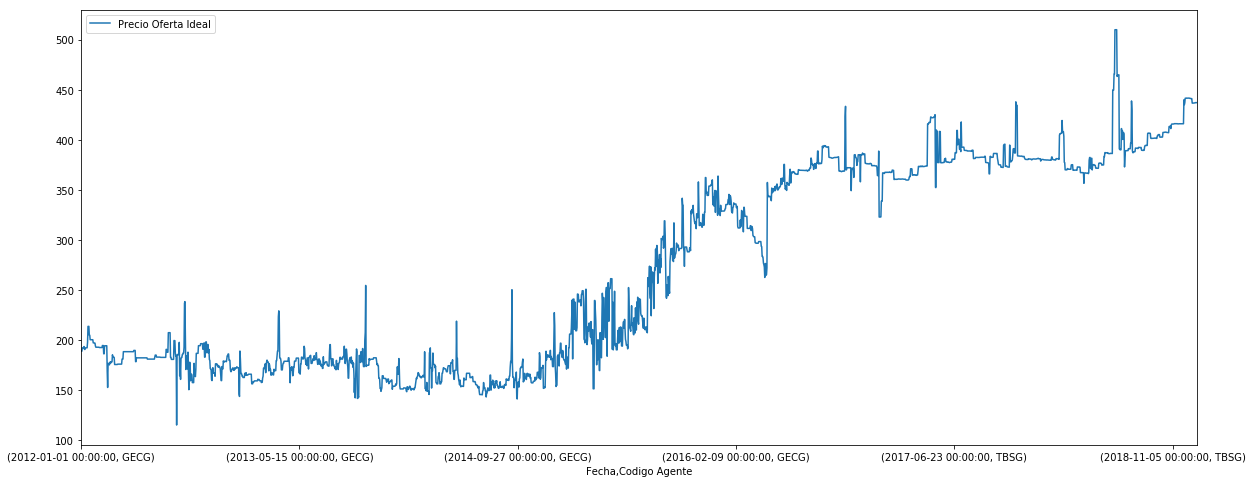

In [33]:
p=Datos.loc['2012-01-01':'2018-12-31']
p.xs('TEBSAB',level='Recurso').plot()
plt.rcParams["figure.figsize"] = (20,8)
d=p.xs('TEBSAB',level='Recurso')

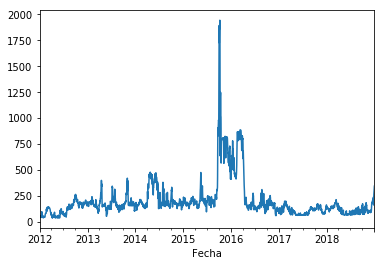

In [29]:
# Ponderados por tecnología

# importa la librería
import pandas as pd
import numpy as np
pd.set_option('display.notebook_repr_html', False)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

Datos1 = pd.read_csv(
    "https://raw.githubusercontent.com/Vamarinpe/PAE/master/Tecnologia.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Fecha"],
    parse_dates=["Fecha"],
    dayfirst=True)

Datos1['PBOLSA'].plot()
plt.rcParams["figure.figsize"] = (20,8)
v=Datos1['PBOLSA']

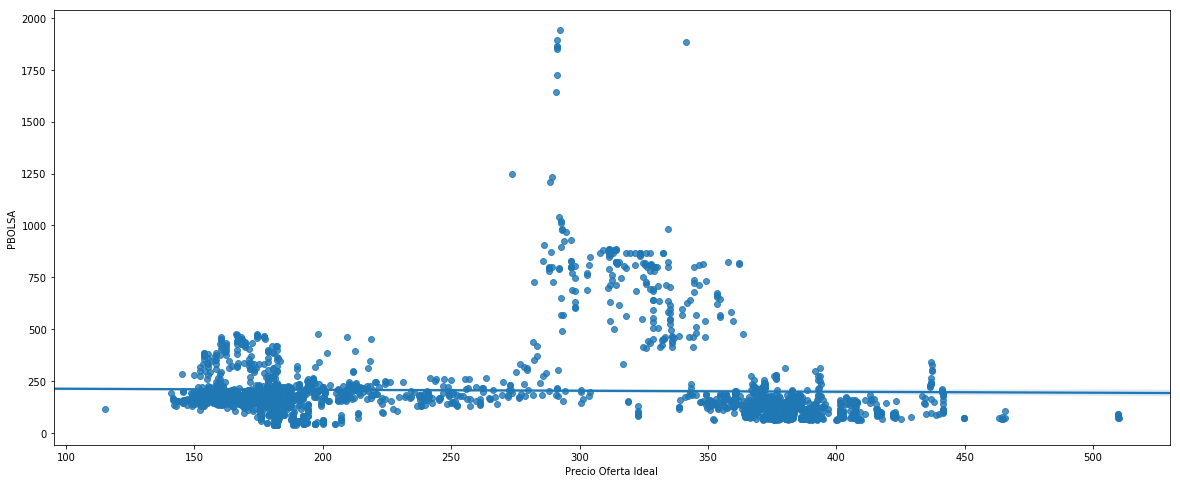

In [34]:
d=d['Precio Oferta Ideal']

import seaborn as sns

g=sns.regplot(x=d,y=v)